In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/performance/Students Performance Prediction.csv


Dataset Head:
  Student_ID Student_Age     Sex High_School_Type Scholarship Additional_Work  \
0   STUDENT1       19-22    Male            Other         50%             Yes   
1   STUDENT2       19-22    Male            Other         50%             Yes   
2   STUDENT3       19-22    Male            State         50%              No   
3   STUDENT4          18  Female          Private         50%             Yes   
4   STUDENT5       19-22    Male          Private         50%              No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes  \
0              No        Private                   0     Always     Yes   Yes   
1              No        Private                   0     Always     Yes    No   
2              No        Private                   2      Never      No    No   
3              No            Bus                   2     Always      No   Yes   
4              No            Bus                  12     Always     Yes    No   

  Listening_

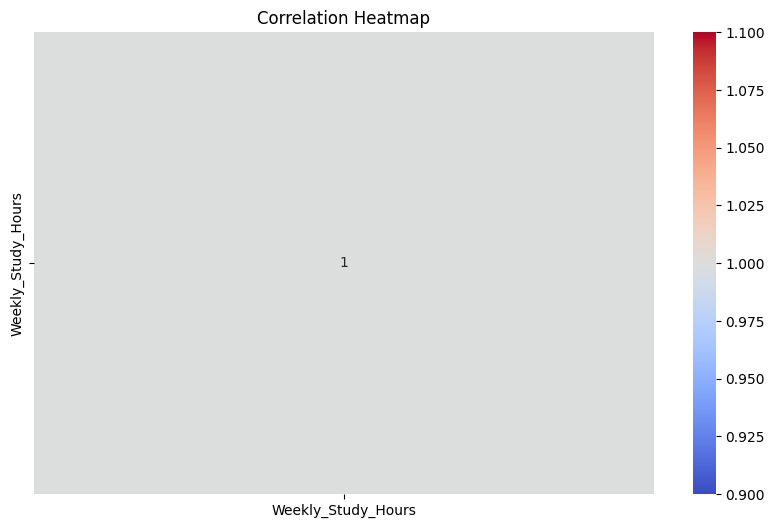

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


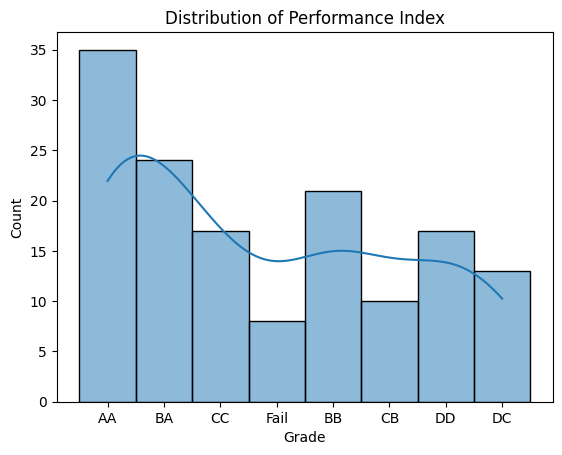


Linear Regression Results:
R^2 Score: -0.060354580752713716
MSE: 5.35851006920218

Random Forest Regressor Results:
R^2 Score: -0.00019839999999970992
MSE: 5.054510344827586


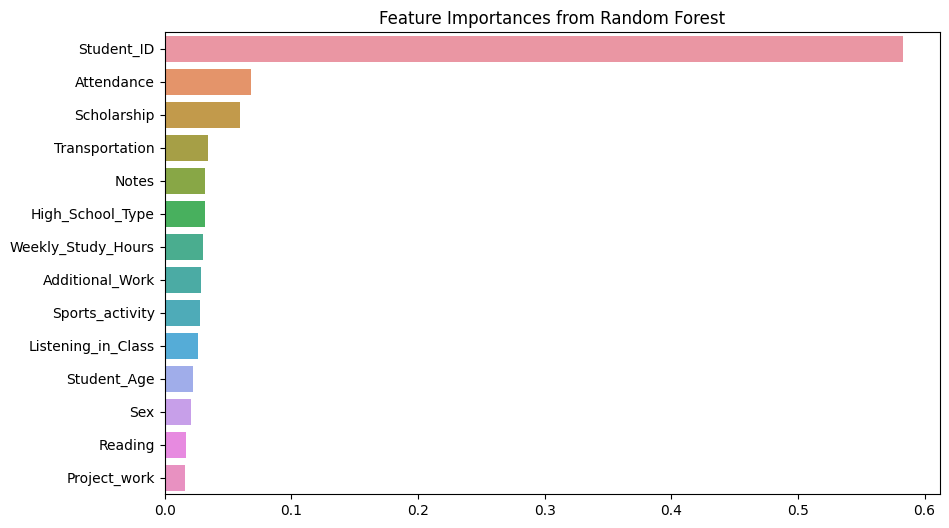

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/kaggle/input/performance/Students Performance Prediction.csv')

# Display basic information
print("Dataset Head:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of target variable (assuming 'Performance Index' or similar column)
target_col = 'Performance Index' if 'Performance Index' in df.columns else df.columns[-1]
sns.histplot(df[target_col], kde=True)
plt.title("Distribution of Performance Index")
plt.show()

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature selection
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLinear Regression Results:")
print("R^2 Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regressor Results:")
print("R^2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

# Feature Importance
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances from Random Forest")
plt.show()